<a href="https://colab.research.google.com/github/farhanrhine/deep-learning/blob/main/weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEIGHT INITIALIZATION PRACTICAL

In [1]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.initializers import GlorotNormal, HeNormal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df["target"].value_counts()

,count
target,
1,71
0,59
2,48


In [5]:
df.shape

(178, 14)

In [6]:
X = df.drop(columns=['target'])
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
type(y_train)

pandas.core.series.Series

In [10]:
# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes=len(np.unique(y)))
y_test = keras.utils.to_categorical(y_test, num_classes=len(np.unique(y)))

In [11]:
type(y_train)

numpy.ndarray

In [12]:
def train_model(initializer, description):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', kernel_initializer=initializer, input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
        keras.layers.Dense(32, activation='relu', kernel_initializer=initializer, name="Hidden_Layer_2"),
        keras.layers.Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    end_time = time.time()

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{description} - Accuracy: {accuracy:.4f}, Training Time: {end_time - start_time:.2f} sec")

    weight_distributions = []
    for layer in model.layers:
        weights, biases = layer.get_weights()
        weight_distributions.append(weights.flatten())

    return history, weight_distributions

In [13]:
histories = {}
weights_data = {}

In [14]:
print("\n========== Default (Random) Initialization ==========")
histories['default'], weights_data['default'] = train_model('random_normal', "Default Random Initialization")

print("\n========== Xavier Initialization ==========")
histories['xavier'], weights_data['xavier'] = train_model(GlorotNormal(), "Xavier Initialization")

print("\n========== He Initialization ==========")
histories['he'], weights_data['he'] = train_model(HeNormal(), "He Initialization")



========== Default (Random) Initialization ==========


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Default Random Initialization - Accuracy: 1.0000, Training Time: 7.65 sec

========== Xavier Initialization ==========

Xavier Initialization - Accuracy: 1.0000, Training Time: 7.71 sec

========== He Initialization ==========

He Initialization - Accuracy: 1.0000, Training Time: 8.44 sec


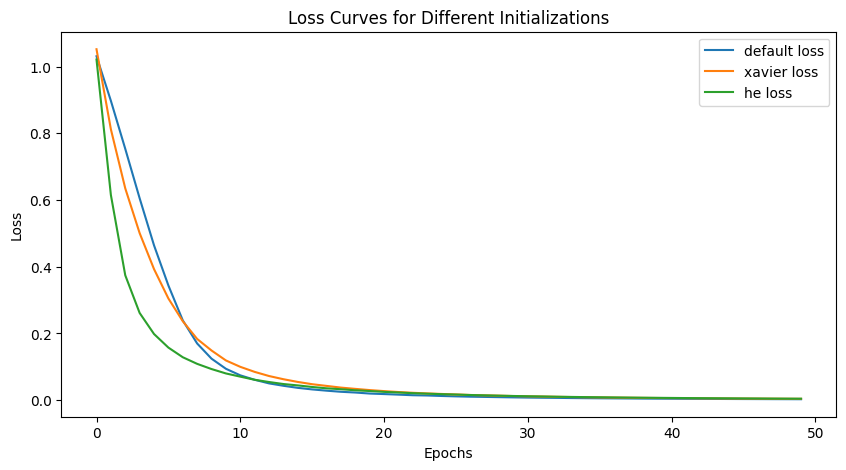

In [15]:
# Plot Training Loss
plt.figure(figsize=(10, 5))
for key, hist in histories.items():
    plt.plot(hist.history['loss'], label=f'{key} loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Initializations")
plt.legend()
plt.show()

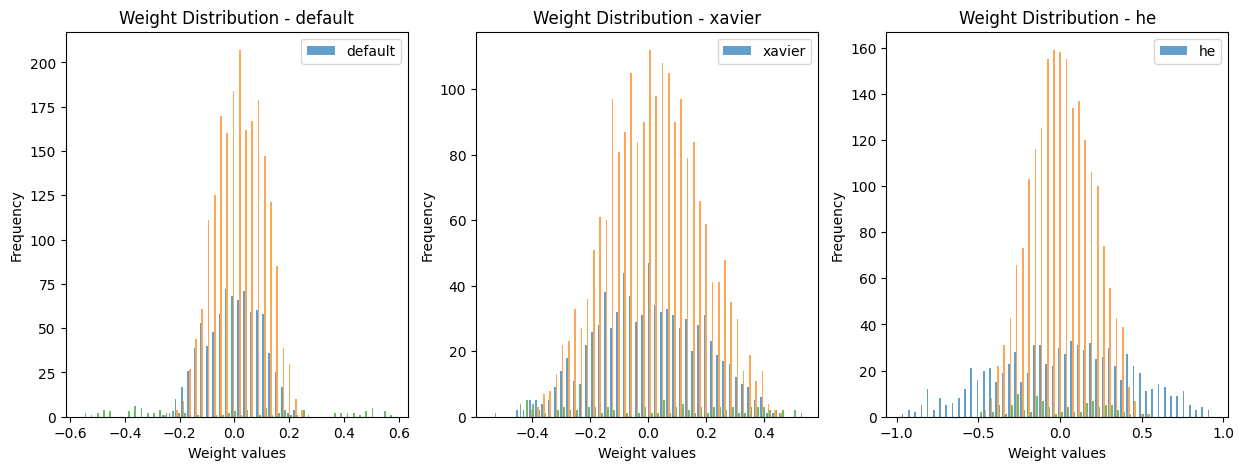

In [16]:
# Plot Weight Distributions
plt.figure(figsize=(15, 5))
for i, (key, weights) in enumerate(weights_data.items()):
    plt.subplot(1, 3, i + 1)
    plt.hist(weights, bins=50, alpha=0.7, label=f'{key}')
    plt.title(f"Weight Distribution - {key}")
    plt.xlabel("Weight values")
    plt.ylabel("Frequency")
    plt.legend()
plt.show()